<a href="https://colab.research.google.com/github/sharop/TallerGrafos24/blob/main/Actividades_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Helper functions
def PlotGraph(grafo, value_on_egdes=False):
  plt.figure(figsize=(8, 6))
  pos = nx.spring_layout(grafo, seed=42)  # para un diseño consistente
  nx.draw(grafo, pos, with_labels=True, node_color='lightblue', node_size=2500)

  if value_on_egdes:
    edge_labels = {i[0:2]:'{}'.format(i[2]['weight']) for i in grafo.edges(data=True)}
    nx.draw_networkx_edge_labels(grafo, pos=pos, edge_labels=edge_labels)


# Ejemplo sencillo de clasificación de peliculas.

['MBros', 'SAW']


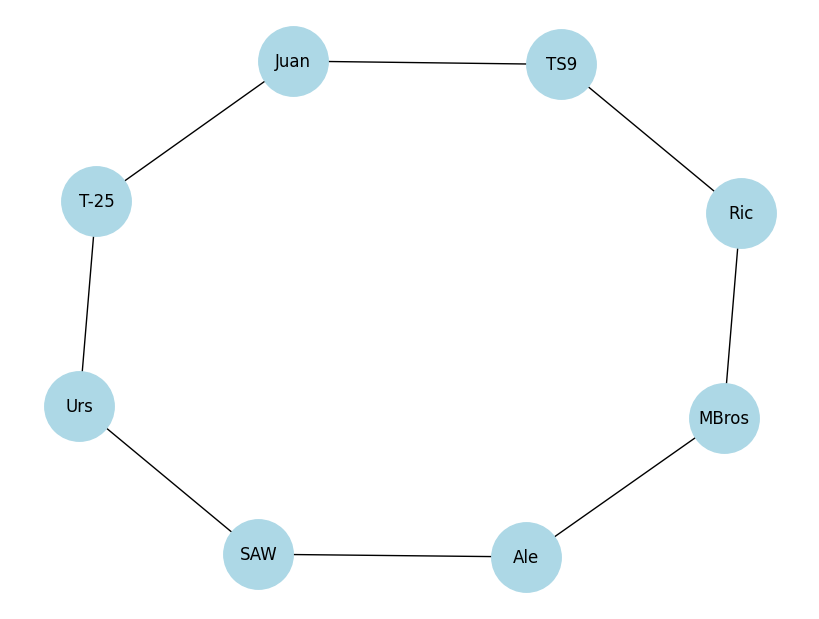

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# Crear un grafo bipartito
G = nx.Graph()
users = ['Juan', 'Ric', 'Urs', 'Ale']
movies = ['TS9', 'T-25', 'SAW', 'MBros']
edges = [('Juan', 'TS9'), ('Juan', 'T-25'), ('Ric', 'TS9'),
 ('Ric', 'MBros'), ('Urs', 'T-25'), ('Urs', 'SAW'), ('Ale', 'SAW'), ('Ale', 'MBros')]
G.add_nodes_from(users, bipartite=0)
G.add_nodes_from(movies, bipartite=1)
G.add_edges_from(edges)

# Dibujar el grafo
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # para un diseño consistente
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500)

# Función para generar recomendaciones
def recommend_movies(user):
    # Buscar películas vistas por el usuario
    seen_movies = set(nx.neighbors(G, user))

    # Encontrar usuarios similares que también han calificado las mismas películas
    similar_users = set()
    for movie in seen_movies:
        for u in G.neighbors(movie):
            similar_users.add(u)

    # Recolectar las películas calificadas por los usuarios similares y no vistas por el usuario objetivo
    candidate_movies = set()
    for u in similar_users:
        for movie in G.neighbors(u):
            if movie not in seen_movies:
                candidate_movies.add(movie)

    return list(candidate_movies)

# Generar recomendaciones para un usuario específico
movies_for= 'Juan'
recommendations = recommend_movies(movies_for)
print(recommendations)


In [ ]:
# G.add_edges_from([(movies_for, r) for r in recommendations])
# nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500)


# Recomendaciones
##  Grafos multipartitos

Ejemplo, Un servicio de streaming de música que incluya nodos para los usuarios, los artistas, los géneros musicales y las canciones.
Un usuario estaría conectado a las canciones que ha escuchado, los artistas a las canciones que han producido, y las canciones a los géneros a los que pertenecen.
Podemos usar este grafo para hacer recomendaciones de varias maneras. Una opción es utilizar un enfoque basado en la vecindad, en el que recomendamos a un usuario las canciones que son "cercanas" a las que ya ha escuchado en el grafo. Por ejemplo, podríamos recomendar canciones de los mismos artistas o del mismo género.

Para el ejemplo siguiente se crea un grafo con usuarios y canciones. Y muestra las conexiones entre usuarios basado en lo que se escucha y canciones basado en los usuarios.

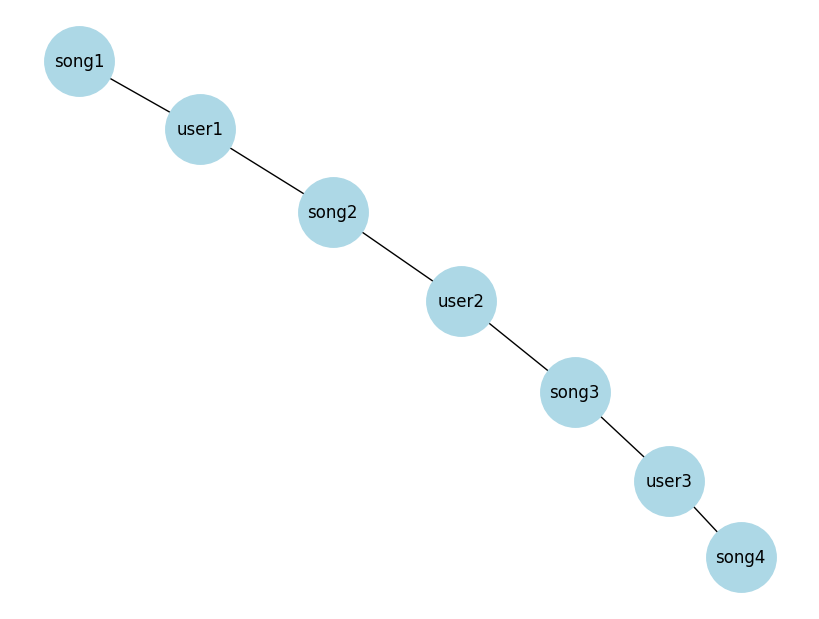

In [6]:
import networkx as nx

# Crear el grafo multipartito no dirigido
B = nx.Graph()
B.add_nodes_from(['user1', 'user2', 'user3'], bipartite=0)
B.add_nodes_from(['song1', 'song2', 'song3', 'song4'], bipartite=1)
B.add_edges_from([('user1', 'song1'), ('user1', 'song2'), ('user2', 'song2'), ('user2', 'song3'), ('user3', 'song3'), ('user3', 'song4')])

PlotGraph(B)


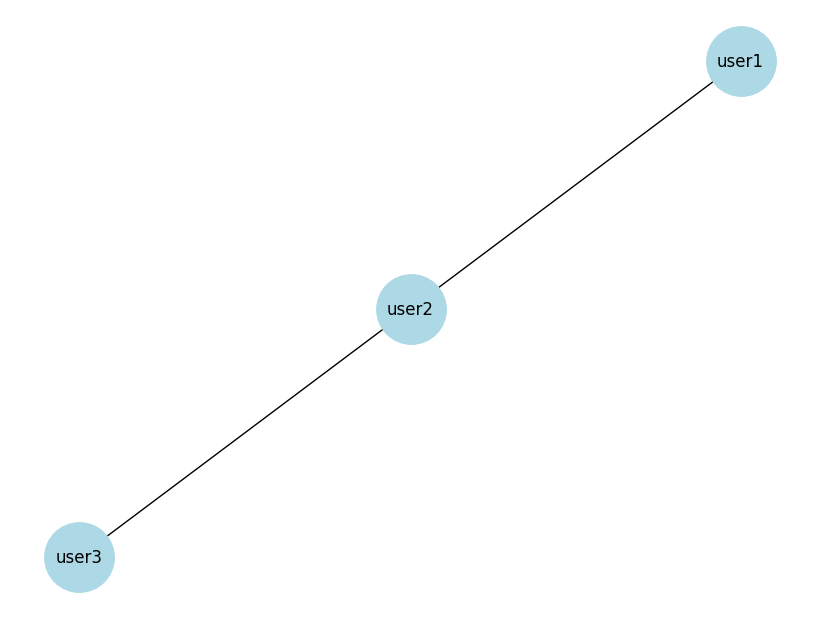

In [7]:
# Crear proyecciones de usuarios y canciones
users = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
user_net = nx.bipartite.projected_graph(B, users)
PlotGraph(user_net)


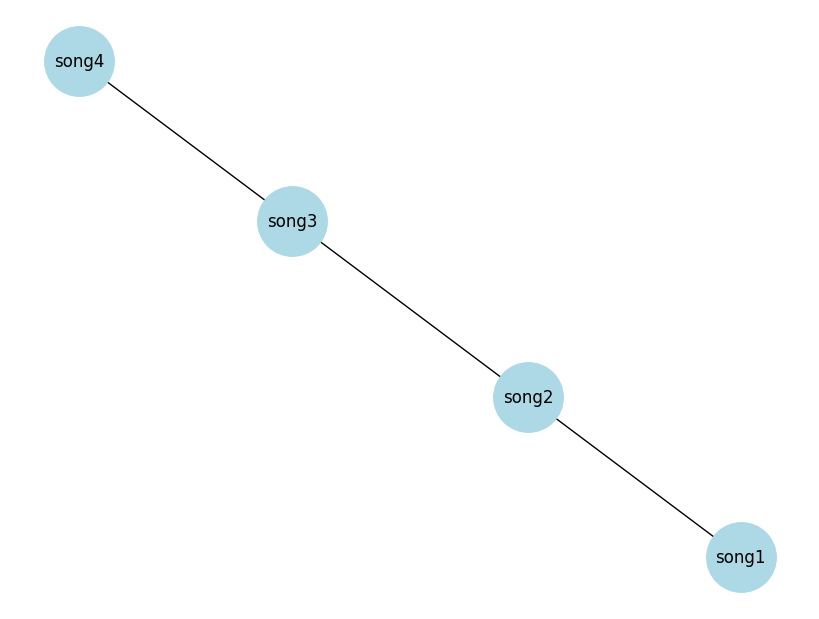

In [8]:
songs = {n for n, d in B.nodes(data=True) if d['bipartite']==1}
song_net = nx.bipartite.projected_graph(B, songs)
PlotGraph(song_net)



In [9]:
# Hacer recomendaciones basadas en la proximidad de los usuarios
for user in user_net:
    print(f"Recomendaciones para {user}:")
    for neighbor in user_net.neighbors(user):
        print(f"   {neighbor}")

Recomendaciones para user1:
   user2
Recomendaciones para user2:
   user1
   user3
Recomendaciones para user3:
   user2


In [10]:
# Hacer recomendaciones basadas en la proximidad de los usuarios
for song in song_net:
    print(f"Recomendaciones para {song}:")
    for neighbor in song_net.neighbors(song):
        print(f"   {neighbor}")

Recomendaciones para song4:
   song3
Recomendaciones para song2:
   song1
   song3
Recomendaciones para song1:
   song2
Recomendaciones para song3:
   song4
   song2


Para hacer recomendaciones de canciones, podríamos recomendar las canciones que han sido escuchadas por usuarios que han escuchado las mismas canciones que el usuario de interés. (Ejemplo que ya hemos visto)

In [12]:
import networkx as nx
from networkx.algorithms import bipartite

# Crear el grafo multipartito
B = nx.Graph()
B.add_nodes_from(['user1', 'user2', 'user3'], bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(['song1', 'song2', 'song3', 'song4'], bipartite=1)
B.add_edges_from([('user1', 'song1'), ('user1', 'song2'), ('user2', 'song2'), ('user2', 'song3'), ('user3', 'song3'), ('user3', 'song4')])

# Crear proyecciones de usuarios y canciones
users = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
songs = {n for n, d in B.nodes(data=True) if d['bipartite']==1}

user_net = nx.bipartite.projected_graph(B, users)
song_net = nx.bipartite.projected_graph(B, songs)

# Hacer recomendaciones basadas en la proximidad de los usuarios
for user in user_net:
    print(f"Recomendaciones para {user}:")
    for neighbor in user_net.neighbors(user):
        # Obtenemos las canciones que ha escuchado el 'vecino'
        neighbor_songs = set(B.neighbors(neighbor))
        # Obtenemos las canciones que ya ha escuchado el usuario
        user_songs = set(B.neighbors(user))
        # Recomendamos las canciones que ha escuchado el 'vecino', pero que el usuario aún no ha escuchado
        recommendations = neighbor_songs - user_songs
        for song in recommendations:
            print(f"   {song}")


Recomendaciones para user1:
   song3
Recomendaciones para user2:
   song1
   song4
Recomendaciones para user3:
   song2


## Mismo ejemplo con mas información.

El código  tomará en cuenta la cantidad de veces que una canción ha sido escuchada por los vecinos de un usuario

In [13]:
import networkx as nx
from networkx.algorithms import bipartite
from collections import Counter

# Crear el grafo multipartito
B = nx.Graph()
B.add_nodes_from(['user1', 'user2', 'user3'], bipartite=0)
B.add_nodes_from(['song1', 'song2', 'song3', 'song4'], bipartite=1)
B.add_edges_from([('user1', 'song1'), ('user1', 'song2'), ('user2', 'song2'),
                  ('user2', 'song3'), ('user3', 'song3'), ('user3', 'song4')])

# Crear proyecciones de usuarios y canciones
users = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
songs = {n for n, d in B.nodes(data=True) if d['bipartite']==1}

user_net = nx.bipartite.projected_graph(B, users)
song_net = nx.bipartite.projected_graph(B, songs)

# Hacer recomendaciones basadas en la proximidad de los usuarios y la popularidad de las canciones
for user in user_net:
    print(f"Recomendaciones para {user}:")
    # inicializamos un contador para las recomendaciones
    rec_counter = Counter()
    for neighbor in user_net.neighbors(user):
        # Obtenemos las canciones que ha escuchado el 'vecino'
        neighbor_songs = set(B.neighbors(neighbor))
        # Obtenemos las canciones que ya ha escuchado el usuario
        user_songs = set(B.neighbors(user))
        # Recomendamos las canciones que ha escuchado el 'vecino', pero que el usuario aún no ha escuchado
        recommendations = neighbor_songs - user_songs
        for song in recommendations:
            # añadimos las recomendaciones al contador
            rec_counter[song] += 1
    # ordenamos las recomendaciones por popularidad (el número de 'vecinos' que las han escuchado)
    sorted_rec = sorted(rec_counter.items(), key=lambda x: x[1], reverse=True)
    for song, count in sorted_rec:
        print(f"   {song} (escuchada por {count} vecinos)")


Recomendaciones para user1:
   song3 (escuchada por 1 vecinos)
Recomendaciones para user2:
   song1 (escuchada por 1 vecinos)
   song4 (escuchada por 1 vecinos)
Recomendaciones para user3:
   song2 (escuchada por 1 vecinos)


ahora recomendará canciones basadas no solo en los vecinos del usuario, sino también en la cantidad de vecinos que han escuchado cada canción.

# MBA con grafos.

Usaremos datos dummy para este ejemplo.

In [14]:
transactions = [
    ['Bread', 'Milk', 'Beer'],
    ['Bread', 'Diapers', 'Eggs'],
    ['Milk', 'Diapers', 'Beer', 'Cola'],
    ['Bread', 'Milk', 'Diapers', 'Beer'],
    ['Bread', 'Milk', 'Cola'],
]


Creamos un grafo ponderado donde los nodos representen articulos y las conexiones representen los articulos que se compraron juntos.

El peso de cada conexion representa el numero de transacciones en las que aparecen ambos articulos.

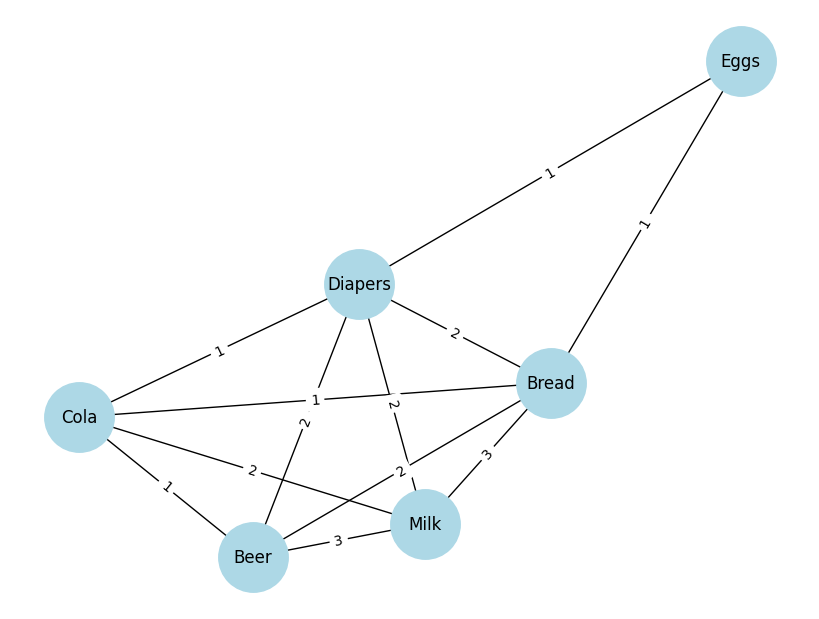

In [15]:
import networkx as nx

G = nx.Graph()

for transaction in transactions:
    for i in range(len(transaction)):
        for j in range(i+1, len(transaction)):
            if G.has_edge(transaction[i], transaction[j]):
                G[transaction[i]][transaction[j]]['weight'] += 1
            else:
                G.add_edge(transaction[i], transaction[j], weight=1)
PlotGraph(G, True)

Por ultimo identificamos las relaciones mas fuertes entre los articulos.

In [16]:
strongest_relations = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

print("Las relaciones más fuertes son:")
for edge in strongest_relations:
    print(f"{edge[0]} y {edge[1]}: {edge[2]['weight']} veces")


Las relaciones más fuertes son:
Bread y Milk: 3 veces
Milk y Beer: 3 veces
Bread y Beer: 2 veces
Bread y Diapers: 2 veces
Milk y Diapers: 2 veces
Milk y Cola: 2 veces
Beer y Diapers: 2 veces
Bread y Eggs: 1 veces
Bread y Cola: 1 veces
Beer y Cola: 1 veces
Diapers y Eggs: 1 veces
Diapers y Cola: 1 veces


## Page RANK

Obteniendo DataSets

In [17]:
# Download MovieLens data.
print("Downloading movielens data...")
from urllib.request import urlretrieve
import zipfile

urlretrieve("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip", "movielens.zip")
zip_ref = zipfile.ZipFile('movielens.zip', "r")
zip_ref.extractall()
print("Done. Dataset contains:")

Done. Dataset contains:


In [18]:
import pandas as pd
import collections
import networkx as nx

ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
merged = pd.merge(ratings, movies, on='movieId', how='left')
merged


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


Creamos un grafo dirigido en el que los nodos son películas y los bordes representan calificaciones de usuarios. Un borde de la película A a la película B significa que un usuario calificó ambas películas.

In [19]:
G = nx.DiGraph()

for user in ratings['userId'].unique():
    user_ratings = ratings[ratings['userId'] == user].sort_values(by='timestamp')
    for i in range(len(user_ratings) - 1):
        G.add_edge(user_ratings.iloc[i]['movieId'], user_ratings.iloc[i+1]['movieId'])


Ahora, podemos calcular PageRank en este grafo. Esto nos dará una puntuación para cada película que representa su importancia en el grafo, que interpretaremos como una recomendación.



In [20]:
pagerank = nx.pagerank(G)


In [ ]:
PlotGraph(G)

Ordenamos un poco.

In [21]:
PRSorted= sorted(pagerank.items(), key=lambda x:x[1], reverse=True)[:10]

Imprimimos el ranking obtenido.

In [22]:
for mid in PRSorted:
  print(merged[merged.movieId==mid[0]].title.values[0])

Forrest Gump (1994)
Pulp Fiction (1994)
American Beauty (1999)
Matrix, The (1999)
Silence of the Lambs, The (1991)
Shawshank Redemption, The (1994)
Fight Club (1999)
Star Wars: Episode IV - A New Hope (1977)
Godfather, The (1972)
Jurassic Park (1993)


Podemos usar estas puntuaciones para hacer recomendaciones a los usuarios. Por ejemplo, para recomendar 5 películas a un usuario, podemos tomar las 5 películas con el mayor PageRank que el usuario aún no ha calificado

In [ ]:
def Recomendacion_Pelicula(user_id, num_recommendations=5):
    seen_movies = ratings[ratings['userId'] == user_id]['movieId'].unique()
    movie_scores = {movie: score for movie, score in pagerank.items() if movie not in seen_movies}
    recommended_movies = sorted(movie_scores, key=movie_scores.get, reverse=True)[:num_recommendations]
    return recommended_movies


Finalmente, podemos implementar un simple análisis de la cesta de la compra observando las películas que los usuarios suelen ver juntas. Por ejemplo, podríamos ver las películas más comúnmente vistas después de una película en particular.

In [ ]:
def commonly_follows(movie_id):
    following_movies = [edge[1] for edge in G.edges(movie_id)]
    counter = collections.Counter(following_movies)
    return counter.most_common(5)


In [ ]:
SelectMovie = 100
print(merged[merged.movieId==SelectMovie].title.values[0])

City Hall (1996)


Regresamos las peliculas que comunmente ven en conjunto.

In [ ]:
fls = commonly_follows(SelectMovie)
for mid in fls:
  print(merged[merged.movieId==mid[0]].title.values[0])

Fantasia (1940)
Like Water for Chocolate (Como agua para chocolate) (1992)
Star Wars: Episode VI - Return of the Jedi (1983)
Incredibles, The (2004)
Independence Day (a.k.a. ID4) (1996)


------

In [ ]:
SelectUser = 100
MbyU = merged[merged.userId==SelectUser].title.values
print('Numero de peliculas calificadas del usuario: ',len(MbyU))
print('Primeras 10: ',MbyU[:10])


Numero de peliculas calificadas del usuario:  148
Primeras 10:  ['Grumpier Old Men (1995)' 'American President, The (1995)'
 'Casino (1995)' 'Sense and Sensibility (1995)'
 'Ace Ventura: When Nature Calls (1995)' 'Persuasion (1995)'
 "Mr. Holland's Opus (1995)" 'Bed of Roses (1996)' 'Nick of Time (1995)'
 'Broken Arrow (1996)']


Regresamos la recomendación de pelicula para el usuario.

In [ ]:
rmovs= Recomendacion_Pelicula(SelectUser)
for mid in rmovs:
  print(merged[merged.movieId==mid].title.values[0])

American Beauty (1999)
Matrix, The (1999)
Silence of the Lambs, The (1991)
Shawshank Redemption, The (1994)
Fight Club (1999)


[318.0, 858.0, 589.0, 2762.0, 4306.0]